In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import  cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [30]:
pd.set_option('display.max_columns', None)
train = pd.read_csv('Training_data.csv')
test = pd.read_csv('Test_data.csv')

In [4]:
train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,10,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,35,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,31,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,29,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,22,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [5]:
test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,22.88,75.59,3367.08,6131.31,41.38,43.08,2.13,102.67,0.500,0.500,75.85,9.48,22.22,58.46,42131.54,0.65,4005.22,0.33,0.33,1.25,28,0.08,0.00,0.05,0.17,0.00,1035.14,158.71,13.28,0.00,1
1,15.94,86.26,5595.00,10867.86,52.29,61.21,3.05,124.94,3.200,2.400,75.00,11.72,15.73,63.36,148530.21,0.33,2281.82,0.38,0.00,2.37,64,0.01,0.00,0.00,0.06,438.50,0.00,72.78,44.88,25.39,1
2,25.16,64.20,4758.44,7818.15,46.28,50.72,2.69,110.16,1.124,0.889,62.57,10.53,32.24,62.83,39652.58,0.55,3050.54,0.36,0.25,1.51,55,0.08,0.02,0.02,0.10,622.70,755.52,102.89,6.24,0.00,1
3,19.50,77.81,5762.27,6290.00,58.14,76.27,2.44,119.92,1.222,1.000,82.50,9.65,48.73,66.29,86341.79,0.50,4169.09,0.31,0.27,2.69,283,0.04,0.00,0.01,0.08,197.55,396.27,76.34,8.44,2.00,1
4,11.11,85.09,11400.50,20936.25,30.00,29.75,0.50,125.89,2.167,1.333,95.86,10.35,37.20,63.30,224497.30,0.00,8970.00,0.00,0.00,1.25,26,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,1


In [7]:
# null value detection
train[train.isnull().any(axis=1)]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default


In [8]:
test[test.isnull().any(axis=1)]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default


In [20]:
#drop null values
#test.dropna()

In [9]:
train.iloc[:,-1].unique()

array([0, 1], dtype=int64)

<AxesSubplot:ylabel='target_deature'>

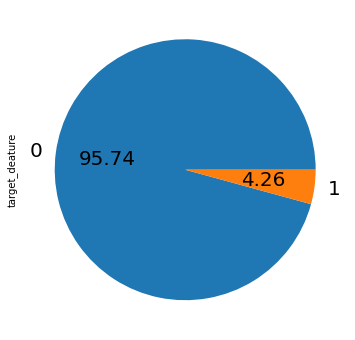

In [18]:
# imbalanced dataset
train.iloc[:,-1].value_counts().plot.pie(autopct="%.2f",ylabel='target_deature',figsize=(6, 6),fontsize=20)

In [65]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
train_mean = x_train.mean()
train_std = x_train.std()
x_train = (x_train-train_mean)/train_std

In [52]:
x_train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
count,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04,9.400000e+04
mean,-5.805285e-17,6.095550e-16,-1.935095e-16,-3.386416e-17,-5.902040e-16,-2.612378e-16,-1.741586e-16,-4.837738e-18,-1.838340e-16,1.112680e-16,1.103004e-15,1.499699e-16,2.709133e-16,1.451321e-16,-2.515624e-16,1.789963e-16,-1.161057e-16,-1.015925e-16,-1.548076e-16,4.160454e-16,2.267690e-17,3.991134e-17,-1.139892e-16,-3.749247e-17,-5.019153e-17,6.349531e-17,-5.366865e-17,5.291276e-17,3.749247e-17,5.049389e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.841905e+00,-7.274242e+00,-2.759477e+00,-1.640693e+00,-2.814145e+00,-2.602750e+00,-1.507083e+00,-3.746084e+00,-2.185637e+00,-2.157636e+00,-7.686795e+00,-3.578524e+00,-1.752427e+00,-4.591846e+00,-1.740106e+00,-1.120214e+00,-3.163273e+00,-1.053054e+00,-7.873346e-01,-2.463963e+00,-9.309252e-01,-6.102686e-01,-1.423810e+00,-1.153357e+00,-8.523753e-01,-2.207855e+00,-1.277366e+00,-5.282368e+00,-8.269834e+00,-8.342927e+00
25%,-6.776423e-01,-5.578749e-01,-6.412698e-01,-5.793875e-01,-5.566234e-01,-5.773185e-01,-6.931046e-01,-6.363163e-01,-5.481701e-01,-6.242172e-01,-4.926856e-01,-6.230299e-01,-5.871885e-01,-5.078969e-01,-6.379782e-01,-6.044376e-01,-5.319089e-01,-6.113983e-01,-7.873346e-01,-6.466065e-01,-6.130049e-01,-4.657144e-01,-4.263948e-01,-4.655415e-01,-4.693744e-01,-6.160634e-01,-5.990294e-01,-6.496426e-01,-4.596470e-01,-4.237308e-01
50%,-1.733655e-02,6.014621e-02,-1.282955e-02,-1.935786e-01,-6.195079e-02,-7.342368e-02,-9.751084e-02,9.451034e-02,-3.967990e-02,-1.238303e-02,7.245276e-02,-1.242055e-02,-1.150954e-01,1.452373e-03,-2.162604e-01,-1.283363e-01,-4.920534e-02,-1.145361e-01,-1.555713e-01,-1.524132e-01,-2.597602e-01,-3.211602e-01,-4.263948e-01,-1.216336e-01,-2.778740e-01,-3.721014e-01,-4.279015e-01,-3.239133e-01,-2.923405e-01,-4.237308e-01
75%,5.989488e-01,6.724022e-01,5.508869e-01,2.985163e-01,4.696753e-01,4.818459e-01,4.980829e-01,5.732263e-01,4.713849e-01,4.706439e-01,6.003497e-01,5.150881e-01,4.041212e-01,5.524151e-01,4.140069e-01,3.080899e-01,4.261263e-01,3.271191e-01,1.954083e-01,5.011974e-01,2.701069e-01,4.022528e-02,7.231257e-02,-1.216336e-01,4.129348e-02,1.893936e-01,2.140308e-01,2.750125e-01,9.581062e-02,1.249144e-01
max,7.677122e+00,1.863476e+00,7.168180e+00,1.913405e+01,9.447689e+00,7.672200e+00,1.702581e+01,1.207026e+01,5.445631e+01,6.531280e+01,1.623557e+00,8.695086e+00,1.855357e+01,7.559296e+00,1.638442e+01,2.665236e+01,1.221484e+01,1.688919e+01,3.431063e+01,1.044883e+01,3.264499e+01,3.776887e+01,3.448312e+01,5.765489e+01,2.519169e+01,3.177800e+01,3.203810e+01,2.321131e+01,1.040978e+02,1.479759e+02


<AxesSubplot:>

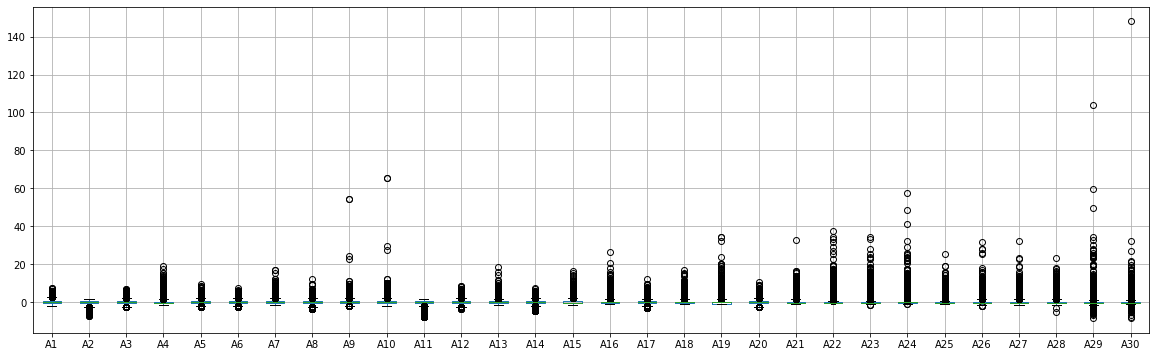

In [53]:
x_train.boxplot(figsize=(20,6))

In [66]:
outliers = np.where(x_train >20)[0]
outliers

array([   18,   417,  1978,  2577,  3302,  5812,  7989,  8490, 10683,
       10696, 12536, 14913, 14913, 18559, 20124, 20124, 20558, 24265,
       28403, 29660, 30043, 32100, 32100, 39568, 39568, 42181, 42393,
       44220, 46161, 47111, 47901, 47901, 49277, 50728, 51516, 52372,
       52390, 52686, 52686, 54325, 54396, 54396, 54396, 55082, 56628,
       56877, 58818, 60036, 60472, 62209, 62674, 62674, 62914, 62914,
       67063, 67672, 68395, 70219, 70219, 70796, 71669, 73468, 73676,
       75080, 75358, 77578, 77578, 77578, 78873, 78873, 80823, 84210,
       84393, 84393, 85296, 85296, 85296, 88867, 89289, 89941, 91318,
       92534, 93190, 93521, 93926], dtype=int64)

In [ ]:
outliers

In [74]:
train = train.drop(outliers, axis=0)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
train_mean = x_train.mean()
train_std = x_train.std()
x_train = (x_train-train_mean)/train_std


In [100]:
x_test = (test.iloc[:,:-1]-train_mean)/train_std
y_test = test.iloc[:,-1]

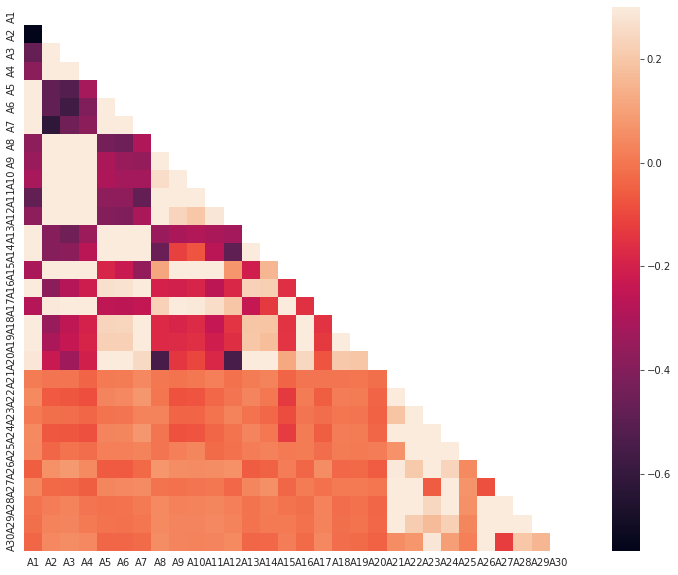

In [86]:
# correlationship
corr = x_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True) # , annot=True

In [96]:
# most related features
corr2target = np.abs(x_train.corrwith(y_train))
corr2target.sort_values(ascending = False)

A1     0.224445
A2     0.214529
A5     0.180195
A6     0.177853
A3     0.172865
A7     0.166483
A11    0.159373
A13    0.150209
A8     0.149974
A16    0.137969
A9     0.137285
A10    0.132220
A14    0.126430
A12    0.124721
A4     0.122895
A18    0.122666
A19    0.113199
A15    0.111569
A17    0.105395
A20    0.102806
A24    0.030536
A22    0.029475
A26    0.024265
A30    0.015914
A28    0.012199
A21    0.011254
A29    0.009247
A25    0.007760
A23    0.007236
A27    0.007042
dtype: float64

In [115]:
# PCA
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(x_train)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Explaned variance': pcs.explained_variance_ratio_,
                           'Cumulative explanation': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Standard deviation,2.7886,1.9491,1.5451,1.4651,1.3268,1.2858,1.1322,1.0474,0.9283,0.8369,0.8195,0.7878,0.7371,0.7316,0.7178,0.6963,0.6855,0.6644,0.6330,0.5974,0.5271,0.4844,0.4634,0.4443,0.3780,0.3563,0.3498,0.2950,0.2627,0.1522
Proportion of variance,0.2592,0.1266,0.0796,0.0716,0.0587,0.0551,0.0427,0.0366,0.0287,0.0233,0.0224,0.0207,0.0181,0.0178,0.0172,0.0162,0.0157,0.0147,0.0134,0.0119,0.0093,0.0078,0.0072,0.0066,0.0048,0.0042,0.0041,0.0029,0.0023,0.0008
Cumulative proportion,0.2592,0.3859,0.4654,0.5370,0.5957,0.6508,0.6935,0.7301,0.7588,0.7821,0.8045,0.8252,0.8433,0.8612,0.8783,0.8945,0.9102,0.9249,0.9382,0.9501,0.9594,0.9672,0.9744,0.9810,0.9857,0.9899,0.9940,0.9969,0.9992,1.0000


In [119]:
#transform
px_train = pd.DataFrame(pcs.transform(x_train), 
                      columns=pcsSummary_df.columns)
px_train = px_train.iloc[:,:23]
px_train = px_train.round(4)

In [127]:
px_test = pd.DataFrame(pcs.transform(x_test), 
                      columns=pcsSummary_df.columns)
px_test = px_test.iloc[:,:23]
px_test = px_test.round(4)

In [130]:
px_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-3.8419,0.5256,-1.4017,0.8964,-0.2505,-1.3080,-0.4921,0.2990,0.6987,-0.1757,-0.0629,-1.1960,-0.5184,0.7303,-0.6590,-0.5865,0.1525,-0.3140,0.0070,-0.3153,0.3757,-0.0515,0.3416
1,-1.3127,-1.0173,2.2803,0.5149,-0.1350,0.4568,1.1963,-0.5397,-2.2222,-0.2383,0.1916,0.7260,0.8204,-1.7863,0.3111,-0.1562,0.2621,0.7502,-1.4809,0.3716,0.0069,0.2546,0.2163
2,-4.5541,0.4818,-0.7735,0.9946,-0.2230,0.1092,1.0946,-1.0866,-0.0283,0.1343,-0.5085,0.1257,-0.6865,0.0433,-0.3604,0.0415,-0.1974,-0.1537,-0.0690,-0.5360,-0.0088,-0.6203,0.6255
3,-4.4218,0.1860,1.7333,-0.0164,-1.5833,-0.5979,1.0534,1.7175,0.4029,-0.3990,-1.8129,2.8200,0.9949,0.7133,0.6971,0.6002,-0.8342,-0.6163,-0.5612,0.7513,-0.5764,-0.0571,-0.4785
4,2.6148,-1.9126,2.0730,-1.0003,0.5870,-0.0779,0.7439,0.2397,3.0323,-1.1667,-0.0816,0.2845,-0.3569,0.7205,-0.6240,0.7478,0.3127,-1.2079,1.4658,-0.7356,-0.1299,0.1354,-0.1759


In [131]:
x_train = px_train
x_test = px_test

In [147]:
# logtics regression
parameters = {
    'C':[0.1,0.5,1,1.5,2],
}
log_clf = LogisticRegression(random_state=1, class_weight='balanced',max_iter = 1000, solver = "saga")
gridsearch= GridSearchCV(log_clf, parameters, cv = 5 )
gridsearch.fit(x_train,y_train)
print('The best parameters are ',gridsearch.best_params_)
best_log = gridsearch.best_estimator_ 

log_propensity = best_log.predict_proba(x_test)
print('coefficients: '+ str(best_log.coef_))
print('intercept: '+str(best_log.intercept_) )
print('mean accuracy: '+str(best_log.score(x_test, y_test)))

The best parameters are  {'C': 0.5}
coefficients: [[-0.42261439  0.02274005 -0.06414131  0.0489691   0.00435469 -0.02215093
   0.02728115 -0.1326628   0.00130609 -0.02523801 -0.02095841  0.03366327
   0.02454801  0.03080161 -0.13217077  0.04723328 -0.01376173 -0.27789392
  -0.17149739  0.01822408  0.10583118  0.05394065 -0.1176147 ]]
intercept: [-0.69227131]
mean accuracy: 0.74


array(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
       'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17',
       'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23'], dtype=object)

In [148]:
# f1-score
f1_score(best_log.predict(x_test),y_test )

0.4282982791586998

In [164]:
# confusion matrix
lgt = pd.crosstab(best_log.predict(x_test),y_test)
lgt

default,0,1
row_0,,
0,7390,380
1,2610,1120


In [151]:
# SVM
parameters = {
    'C':[0.1,0.5,1,5,10],
  #  'gamma' : [0.1, 1, 10],
}
svc_clf = SVC(random_state=1, class_weight='balanced',max_iter = 5000, kernel='linear')
gridsearch= GridSearchCV(svc_clf, parameters, cv = 3 )
gridsearch.fit(x_train,y_train)
print('The best parameters are ',gridsearch.best_params_)
best_svc = gridsearch.best_estimator_ 

#log_propensity = best_svc.predict_proba(x_test)
print('coefficients: '+ str(best_svc.coef_))
print('intercept: '+str(best_svc.intercept_) )
print('mean accuracy: '+str(best_svc.score(x_test, y_test)))

C:\Users\zwdua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\zwdua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\zwdua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\zwdua\AppData\Local\Packages\PythonSoftwareFou

The best parameters are  {'C': 0.5}
coefficients: [[ 0.17639131 -0.14702169  0.08732633 -0.05274255  0.16548303  0.06517043
  -0.11921189 -0.13378384  0.06240576  0.06665799 -0.22063819  0.07504926
  -0.01410756 -0.02882493  0.04940831  0.1259898   0.03233215  0.06453803
   0.03073522 -0.13172251 -0.13952769  0.14631055 -0.06430658]]
intercept: [0.88014685]
mean accuracy: 0.1608695652173913


In [163]:
# f1-score
print("The F-1 Score is " + str(f1_score(best_svc.predict(x_test),y_test )))
# confusion matrix
pd.crosstab(best_svc.predict(x_test),y_test)

The F-1 Score is 0.1790028926322954


default,0,1
row_0,,
0,798,448
1,9202,1052


In [155]:
# Ramdon Forest Tree

parameters = {
    'ccp_alpha':np.arange(0.005,0.040,0.005),
    
}
classtree = RandomForestClassifier(criterion='entropy',random_state = 1,class_weight='balanced',min_samples_leaf=5,n_jobs=-1)
gridsearch =GridSearchCV(classtree, parameters, cv = 3 )
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              min_samples_leaf=5, n_jobs=-1,
                                              random_state=1),
             param_grid={'ccp_alpha': array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ])})

In [156]:
print('The best parameters are ',gridsearch.best_params_)
best_RF = gridsearch.best_estimator_ 

The best parameters are  {'ccp_alpha': 0.030000000000000002}


In [162]:
# f1-score
print("The F-1 Score is " + str(f1_score(best_RF.predict(x_test),y_test )))
RF = pd.crosstab(best_RF.predict(x_test),y_test)
RF

The F-1 Score is 0.4320096269554754


default,0,1
row_0,,
0,7591,423
1,2409,1077


Performance Evaluation

In [165]:
def performance(conf):
    sen = conf.iloc[1,1]/sum(conf.iloc[:,1])
    spe = conf.iloc[0,0]/sum(conf.iloc[:,0])
    F1 = 2*conf.iloc[1,1]/(2*conf.iloc[1,1]+conf.iloc[0,1]+conf.iloc[1,0])
    accu = (conf.iloc[1,1]+conf.iloc[0,0])/(sum(conf.iloc[:,1])+sum(conf.iloc[:,0]))
    return [accu,sen,spe,F1]

In [166]:
model_perf=pd.DataFrame([performance(lgt),performance(RF)],
                        index = ['Logistic','Random Forest'],
                        columns = ['Accuracy','Sensitivity','Specificity','F-1 Score'])
model_perf

,Accuracy,Sensitivity,Specificity,F-1 Score
Logistic,0.740000,0.746667,0.7390,0.428298
Random Forest,0.753739,0.718000,0.7591,0.432010


<AxesSubplot:title={'center':'Logistic Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

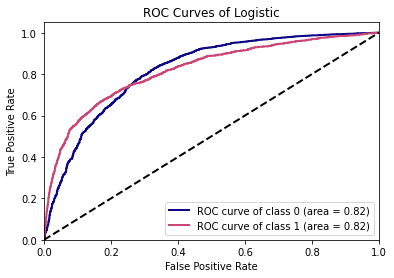

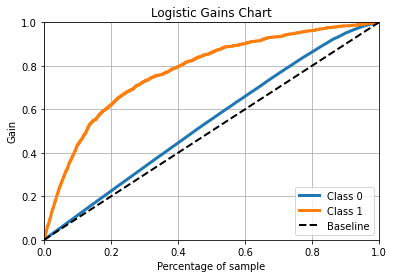

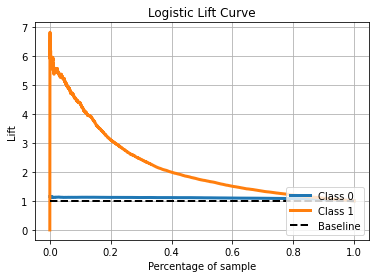

In [178]:
import scikitplot as skplt
lgt_propensity = best_log.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, lgt_propensity,
                              title = 'ROC Curves of Logistic', 
                              plot_micro=False,
                              plot_macro =False,
                              cmap  = 'plasma')
skplt.metrics.plot_cumulative_gain(y_test, lgt_propensity,title = 'Logistic Gains Chart')
skplt.metrics.plot_lift_curve(y_test, lgt_propensity,title = 'Logistic Lift Curve')



<AxesSubplot:title={'center':'RF Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

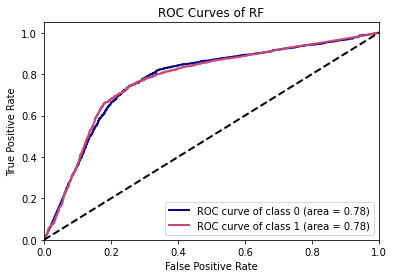

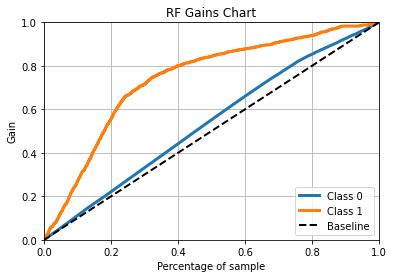

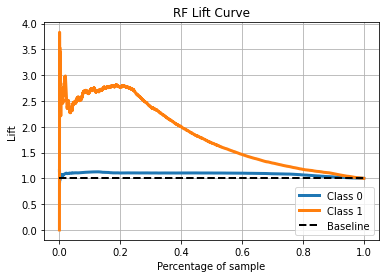

In [179]:
RF_propensity = best_RF.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, RF_propensity,
                              title = 'ROC Curves of RF', 
                              plot_micro=False,
                              plot_macro =False,
                              cmap  = 'plasma')
skplt.metrics.plot_cumulative_gain(y_test, RF_propensity,title = 'RF Gains Chart')
skplt.metrics.plot_lift_curve(y_test, RF_propensity,title = 'RF Lift Curve')
